In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
# imdb 데이터 불러오기
# 단어사전은 500개 까지만 가져옴
# 원핫인코딩을 진행하면 토큰이 500개가 생성됨 (=컬럼개수)
(train_input,train_target),(test_input,test_target) = keras.datasets.imdb.load_data(
    num_words = 500
)

In [3]:
print(train_input.shape, train_target.shape)

(25000,) (25000,)


In [4]:
print(train_input[0]) 

# 1의 의미 : 토큰시작
# 2의 의미 : 단어사전에 없는 단어
# 숫자마다 다른 단어들이 들어가 있다

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
# 이진 분류 : 긍정 - 1, 부정 - 0
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split
train_input,val_input,train_target,val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [7]:
print(train_input.shape, val_input.shape)

(20000,) (5000,)


In [8]:
len(train_input[0])

259

In [9]:
# 이미 numpy 타입을 가지고 있음
type(train_input)

numpy.ndarray

In [10]:
lengths = np.array([len(x) for x in train_input])
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [11]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


In [12]:
# 가장 긴 길이의 문장 속 단어 개수
np.max(lengths)

1854

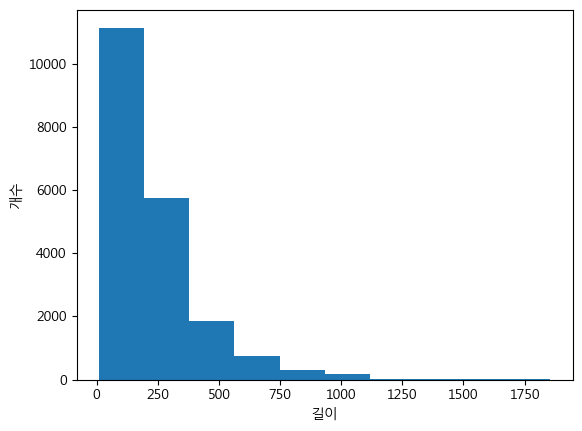

In [13]:
plt.hist(lengths)
plt.xlabel('길이')
plt.ylabel('개수')
plt.show()

In [14]:
# 시퀀스 패딩
# 글자의 수를 제한해서 그보다 짧은 리뷰의 길이는 0으로 채워줌
# 최대 글자수 100개로 제한
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)


In [15]:
# 2만개의 샘플, 크기 100개로 제한(= 단어개수)
train_seq.shape

(20000, 100)

In [16]:
# 시퀀스패딩 적용해서 0이 없으면 글자가 짤린 것임!
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [17]:
# 시퀀스 패딩은 100개 이상의 단어를 가진 문장을 자를 때 앞부분을 제외한다.(뒤 내용이 더 중요하다고 판단)
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [18]:
# 6번째 샘플은 앞부분이 0으로 채워져있음
# 100개 단어보다 적은 문장임을 알 수 있다~
# 0의 값을 최다 빈도의 단어로 채우기 위해서 value_count[0][1] => ['value','count']를 사용한다.

print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [19]:
# 검증세트 - 시퀀스패딩
val_seq = pad_sequences(val_input,maxlen=100)

In [20]:
# 순환 신경망 모델 구현
model = keras.Sequential()
# 순환신걍밍 알고리즘
# 시퀀스패딩 - 단어개수 100, 단어사전 500개
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# 이진분류
model.add(keras.layers.Dense(1,activation='sigmoid'))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# 300개의 고유 단어 모두 원핫 인코딩으로 변환
# fit 훈련데이터 3차원 변환
# 배열의 길이는 0~299로 300개 (= 컬럼 개수)
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [22]:
print(train_oh.shape)

(20000, 100, 500)


In [23]:
# train_oh의 첫번째 샘플 : 10 출력 -> 11번째 원소가 1인 것을 확인
print(train_oh[0][0][:12]) 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [24]:
# 500개 컬럼의 합은 무조건 1 - 500개 단어에 대한 원핫인코딩을 진행했기 때문에
print(np.sum(train_oh[0][0]))

1.0


In [25]:
model.summary()

# Param = 4,072 = 500(단어개수)x8(cell)+ 8(cell)x8(cell) + 8(절편)
# Dense = 9 = 8(절편) + 1(dense)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         4,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

모델 훈련

In [26]:
# adam 말고 다른걸로
# RMSprop
# 원핫인코딩&이진분류 loss='binary_crossentropy'

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRNN_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
history = model.fit(train_oh,train_target,batch_size=64,epochs=100,
                    validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5064 - loss: 0.7038 - val_accuracy: 0.5002 - val_loss: 0.6994
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5096 - loss: 0.6968 - val_accuracy: 0.5082 - val_loss: 0.6942
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5237 - loss: 0.6912 - val_accuracy: 0.5218 - val_loss: 0.6908
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5439 - loss: 0.6860 - val_accuracy: 0.5390 - val_loss: 0.6869
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5676 - loss: 0.6814 - val_accuracy: 0.5648 - val_loss: 0.6817
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5911 - loss: 0.6747 - val_accuracy: 0.5876 - val_loss: 0.6732
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6175 - loss: 0.6633 - val_accuracy: 0.6576 - val_loss: 0.6303
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6765 - loss: 0.6067 -

In [27]:
model.evaluate(val_oh,val_target)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7867 - loss: 0.4658


[0.4594515562057495, 0.7868000268936157]

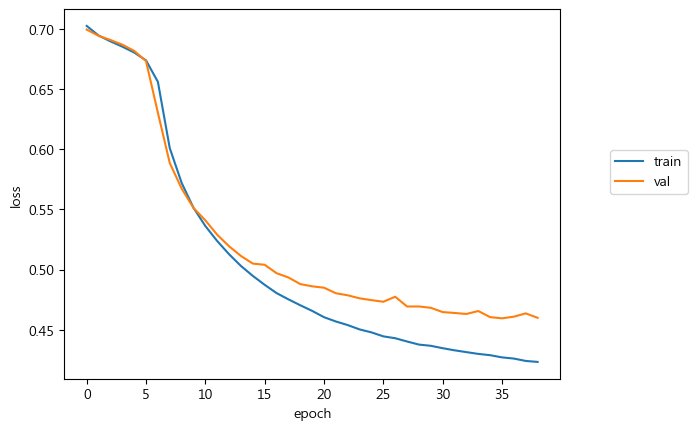

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'],loc=(1.1,0.5))

In [29]:
# stop 위치 출력 -  stop 2번 전의 모델이 가장 좋음
early_stopping_cb.stopped_epoch

38

In [30]:
# test 세트 검증
test_seq = pad_sequences(test_input, maxlen=100)

test_seq.shape


(25000, 100)

In [31]:
# test 세트 원핫인코딩
test_oh = keras.utils.to_categorical(test_seq)

In [32]:
# test 세트 정확도
model.evaluate(test_oh,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7901 - loss: 0.4564


[0.45711395144462585, 0.7904000282287598]

In [33]:
# 딥러닝 훈련 - 순환 신경망
# 데이터전처리 train_seq = pad_sequences(train_input, maxlen=100)

# 모델결정 
# model = keras.Sequential()
# 순환신경망(RNN)
# model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# model.add(keras.layers.Dense(1,activation='sigmoid'))  # 긍정/부정 이중분류
# model.summary()

# fit 훈련데이터 3차원 변환
# train_oh = keras.utils.to_categorical(train_seq)
# val_oh = keras.utils.to_categorical(val_seq)

# 모델 훈련
# 모델설정 옵티마이저 - RMSprop
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
# model.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
# checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRNN_model.keras')
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
# history = model.fit(train_oh,train_target,batch_size=64,epochs=100,
#                     validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_oh,val_target)

# test 세트 검증
# test_seq = pad_sequences(test_input, maxlen=100)
# test_oh = keras.utils.to_categorical(test_seq)
# test 세트 정확도
# model.evaluate(test_oh,test_target)

# 임베딩
# model2 = keras.Sequential()
# model2.add(keras.layers.Embedding(500,16,input_length=100))
# model2.add(keras.layers.SimpleRNN(8))
# model2.add(keras.layers.Dense(1, activation='sigmoid'))

단어 임베딩

In [34]:
model2 = keras.Sequential()
# 임베딩
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))


c:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [35]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRNN_embedding_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
history = model2.fit(train_seq,train_target,batch_size=64,epochs=100,
                    validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4953 - loss: 0.6981 - val_accuracy: 0.5036 - val_loss: 0.6956
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5300 - loss: 0.6907 - val_accuracy: 0.5264 - val_loss: 0.6899
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5690 - loss: 0.6826 - val_accuracy: 0.5590 - val_loss: 0.6825
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6010 - loss: 0.6722 - val_accuracy: 0.5908 - val_loss: 0.6700
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6355 - loss: 0.6548 - val_accuracy: 0.7106 - val_loss: 0.5838
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7217 - loss: 0.5673 - val_accuracy: 0.7324 - val_loss: 0.5532
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7453 - loss: 0.5341 - val_accuracy: 0.7548 - val_loss: 0.5248
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7640 - loss: 0.5114 - 

In [39]:
model2.evaluate(val_seq,val_target)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7879 - loss: 0.4612


[0.45561468601226807, 0.7915999889373779]

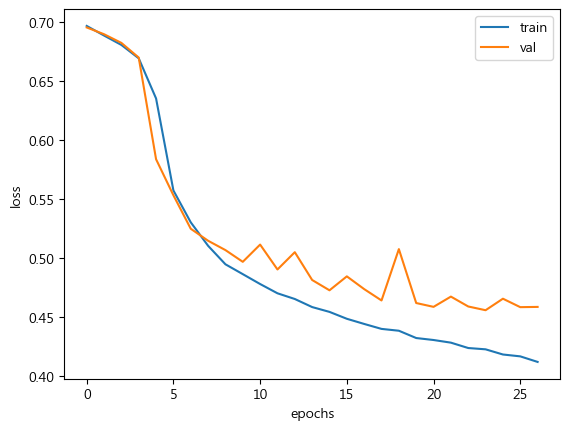

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [42]:
# test_inptu 세트 검증

# 시퀀스 패딩
test_seq = pad_sequences(test_input, maxlen=100)

In [44]:
# test 세트 정확도
model2.evaluate(test_seq,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7951 - loss: 0.4485


[0.4486808180809021, 0.7928400039672852]

In [ ]:
# 딥러닝 훈련 - 단어 임베딩
# 데이터전처리 train_seq = pad_sequences(train_input, maxlen=100)

# 모델결정 
# model2 = keras.Sequential()
# # 임베딩
# model2.add(keras.layers.Embedding(500,16,input_length=100))
# model2.add(keras.layers.SimpleRNN(8))
# model2.add(keras.layers.Dense(1, activation='sigmoid'))
# model.summary()

# 모델 훈련
# 모델설정 옵티마이저 - RMSprop
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
# model2.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
# checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRNN_embedding_model.keras')
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
# history = model2.fit(train_seq,train_target,batch_size=64,epochs=100,
#                     validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model2.evaluate(val_seq,val_target)

# test 세트 검증
# test_seq = pad_sequences(test_input, maxlen=100)
# test 세트 정확도
# model.evaluate(test_seq,test_target)

# 임베딩
# model2 = keras.Sequential()
# model2.add(keras.layers.Embedding(500,16,input_length=100))
# model2.add(keras.layers.SimpleRNN(8))
# model2.add(keras.layers.Dense(1, activation='sigmoid'))